In [87]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
outcomes = np.array([500, 100, 100, 50, 25, 25, 0, 0, 0, 0, 25, 20 ,15, 15, 10, 5, 5, 5, 0, 0])
treatment = np.array([1]*10 + [0]*10)

In [120]:
def sharp_null_hypothesis_test(outcomes, treatment, iterations=100):
    """
    outcomes: A 1D array of numeric outcomes
    treatment: A 1D array of binary values, where 1 = treatment
    iterations: The number of times to calculate the difference between
        randomly splitting the outcomes into treatment and control
    """
    # calculate actual difference
    treatment_effect = outcomes[treatment == 1].mean()
    control_effect = outcomes[treatment == 0].mean()
    actual_estimated_effect = treatment_effect - control_effect
    print("Actual estimated effect:", actual_estimated_effect)

    # Simulate difference with random treatment-control splits
    results = []
    
    for _ in range(iterations):
        random_treatment = np.random.permutation(treatment)
        rand_treatment_effect = outcomes[random_treatment == 1].mean()
        rand_control_effect = outcomes[random_treatment == 0].mean()
        rand_estimate_effect = rand_treatment_effect - rand_control_effect
        results.append(rand_estimate_effect)
    
    results = pd.Series(results)
    
    simulated_p_value = (results >= actual_estimated_effect).mean()
    
    results.hist(bins=50)
    plt.title("Simulated p-value: " + str(simulated_p_value))
    plt.axvline(x=actual_estimated_effect, c="g", linewidth=5)
    plt.show()

Actual estimated effect: 70.0


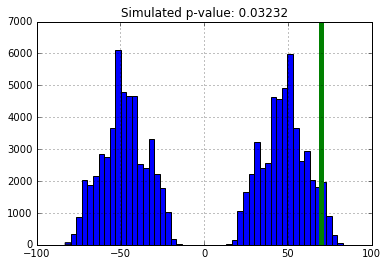

Wall time: 4.46 s


In [121]:
%%time
sharp_null_hypothesis_test(outcomes, treatment, iterations=100000)